In [1]:
from typing import List, Union

from numpy import sqrt, isinf
import pandas as pd
import xarray as xr
xr.set_options(keep_attrs=True,
               display_expand_data=False)

import plotly.express as px
import plotly.io as pio
# pio.renderers.default='png'

import yfinance as yf

from data import get_factor_data, build_factor_data2
from chart import draw_volatility, draw_correlation


In [2]:
halflifes = [21, 63, 126, 252, 512]
# data = get_factor_data(halflifes)
data = build_factor_data2(halflifes)
factor_master = pd.DataFrame(data['factor_name'].attrs).T
factor_list = factor_master.index.to_list()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [3]:
draw_volatility(data.vol, factor_name='QQQ', vol_type=[21, 63]).show()
draw_correlation(data.corr, factor_name='QQQ', factor_name_1='IWM', corr_type=[21, 63]).show()

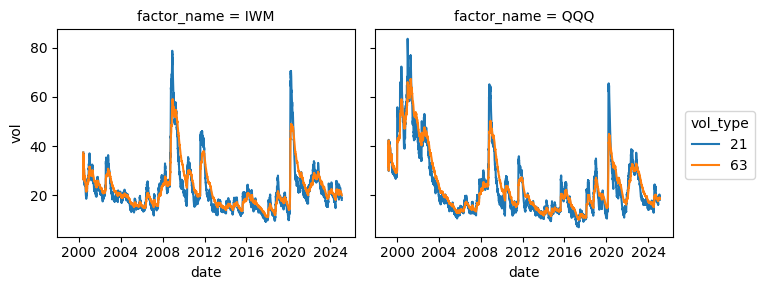

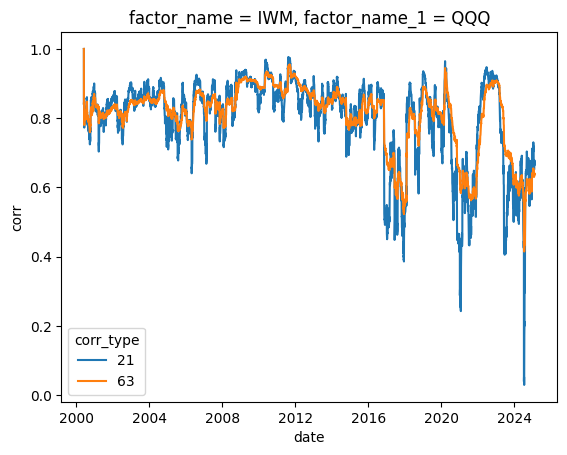

factor_name_1,SPY,QQQ,IWM
factor_name,,,
SPY,1.000000,0.941371,0.780656
QQQ,0.941371,1.000000,0.638654
IWM,0.780656,0.638654,1.000000


In [6]:
import matplotlib.pyplot as plt

data.vol.sel(factor_name=['IWM', 'QQQ'], vol_type=[21, 63]).plot(hue='vol_type', col='factor_name')
plt.show()

data.corr.sel(factor_name='IWM', factor_name_1='QQQ', corr_type=[21, 63]).plot(hue='corr_type')
plt.show()

corr_list = ['SPY', 'QQQ', 'IWM']
data.corr.sel(date=data.date.max(), factor_name=corr_list, factor_name_1=corr_list, corr_type=63).to_pandas()

In [ ]:
data

# Charting scratch

In [7]:
def format_plotly_title(title: str, subtitles: List[str]) -> dict:
    """
    Format a title and a list of subtitles for a Plotly chart.

    Parameters
    ----------
    title : str
        The main title of the chart.
    subtitles : List[str]
        A list of subtitles for the chart.

    Returns
    -------
    dict
        A dictionary containing the formatted title and subtitles for Plotly.
    """
    # subtitle_text = "<br>".join([f"<sup>{subtitle}</sup>" for subtitle in subtitles])
    subtitle_text = f'<span style="font size: 12px;">{"<br>".join(subtitles)}</span>'
    return {
        'text': f'{title}<br><span style="font size: 12px;">{"<br>".join(subtitles)}</span>',
        # 'x': 0.5,
        # 'xanchor': 'center',
        # 'yanchor': 'top'
    }

# Example usage:
# formatted_title = format_plotly_title("Main Title", ["Subtitle 1", "Subtitle 2"])
# fig.update_layout(title=formatted_title)
# fig.show()
# formatted_title

In [8]:
from typing import Union

def format_plotly_title(title: str, subtitles: Union[str, List[str]]) -> dict:
    """
    Format a title and a list of subtitles for a Plotly chart.

    Parameters
    ----------
    title : str
        The main title of the chart.
    subtitles : Union[str, List[str]]
        A single subtitle or a list of subtitles for the chart.

    Returns
    -------
    dict
        A dictionary containing the formatted title and subtitles for Plotly.
    """
    if isinstance(subtitles, str):
        subtitles = [subtitles]
    subtitle_text = f'<span style="font size: 12px;">{"<br>".join(subtitles)}</span>'
    return {
        'text': f'{title}<br><span style="font size: 12px;">{"<br>".join(subtitles)}</span>',
    }

# # Example usage:
# formatted_title = format_plotly_title("Main Title", "Single Subtitle")
# fig.update_layout(title=formatted_title)
# fig.show()
# formatted_title


In [9]:
def plotly_line_chart(da: xr.DataArray, x: str, y: str, color: str = None, title: str = "Line Chart") -> None:
    """
    Produce a Plotly Express line chart given an xarray DataArray.

    Parameters
    ----------
    da : xr.DataArray
        The input xarray DataArray.
    x : str
        The name of the dimension to use for the x-axis.
    y : str
        The name of the dimension to use for the y-axis.
    color : str, optional
        The name of the dimension to use for color grouping, by default None.
    title : str, optional
        The title of the chart, by default "Line Chart".

    Returns
    -------
    None
    """
    df = da.to_series().reset_index()
    fig = px.line(df, x=x, y=y, color=color, title=title, template='plotly_white')
    fig.show()

# Example usage:
# plotly_line_chart(ds.vol, x='date', y='vol', color='vol_type', title='Volatility Over Time')

In [10]:
da = data.ret.sel(asset='QQQ') / data.ret.sel(asset='IWM')
# data.ret.assign_coordinate()

KeyError: "'asset' is not a valid dimension or coordinate for Dataset with dimensions FrozenMappingWarningOnValuesAccess({'date': 8066, 'factor_name': 62})"